In [138]:
pip install gymnasium

In [139]:
import gymnasium
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [149]:
environment=gymnasium.make("FrozenLake-v1",is_slippery=False,render_mode="ansi")
environment.reset()

(0, {'prob': 1})

In [150]:
nb_states=environment.observation_space.n
nb_actions=environment.action_space.n
qtable=np.zeros((nb_states,nb_actions))

In [151]:
episodes=1000#episode
alpha=0.5#learning rate
gama=0.9#discount rate
outcomes=[]

In [152]:
qtable#agent's brain

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [153]:
#agent training
for _ in tqdm(range(episodes)):
    state,_=environment.reset()#success status of the agent
    done=False
    outcomes.append("Failure")
    while not done:#until the agent succeeds
      if np.max(qtable[state])>0:
        action=np.argmax(qtable[state])
      else:
        action = environment.action_space.sample()
      new_state,reward,done,info,_=environment.step(action)

      qtable[state,action]=qtable[state,action]+alpha*(reward+gama*np.max(qtable[new_state,:])-qtable[state,action])#update qtable
      state=new_state
      if reward:
        outcomes[-1]="Success"


100%|██████████| 1000/1000 [00:00<00:00, 3096.01it/s]


In [154]:
print(" Qtable After Training:\n" , qtable)

 Qtable After Training:
 [[0.      0.      0.59049 0.     ]
 [0.      0.      0.6561  0.     ]
 [0.      0.729   0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


Exception ignored in: <function tqdm.__del__ at 0x7a94b01e3c70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/usr/local/lib/python3.10/dist-packages/tqdm/std.py", line 1277, in close
    if self.last_print_t < self.start_t + self.delay:
AttributeError: 'tqdm' object has no attribute 'last_print_t'


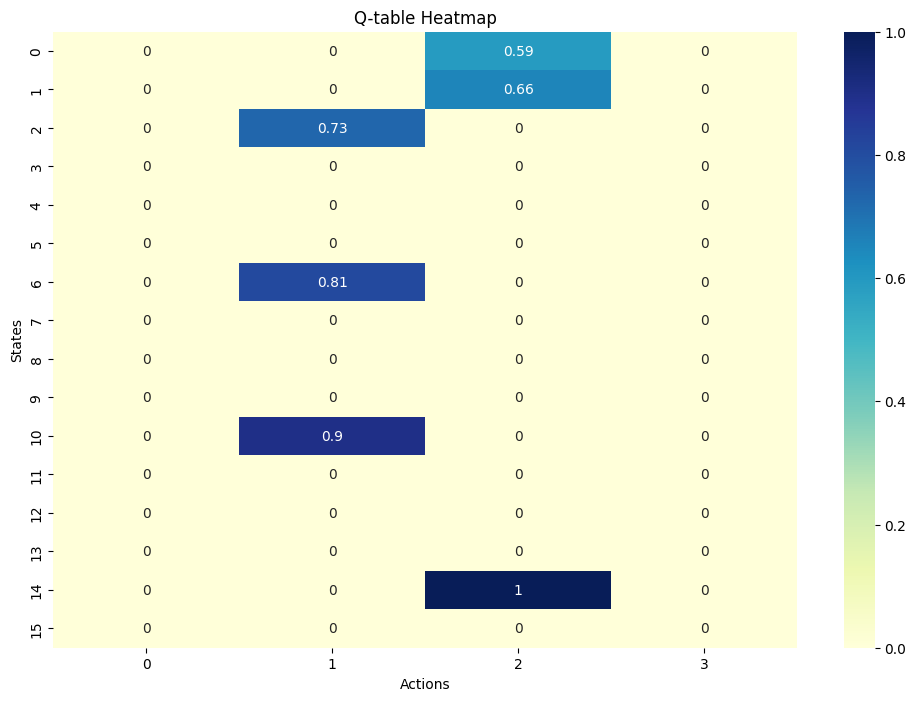

In [163]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(qtable, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Q-table Heatmap")
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()

<BarContainer object of 1000 artists>

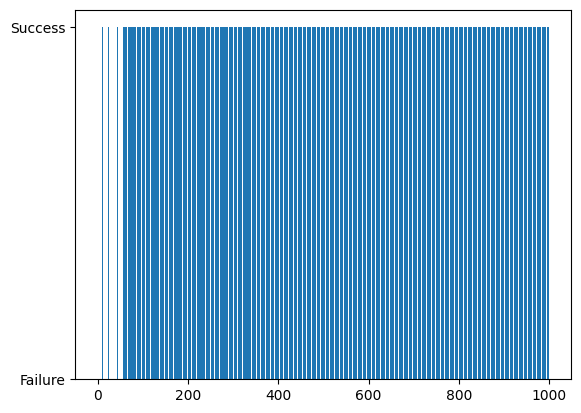

In [155]:
plt.bar(range(episodes),outcomes)

In [157]:
#test
episodes=100
nb_success=0
for _ in tqdm(range(episodes)):
  state,_=environment.reset()
  done=False
  while not done:
    if np.max(qtable[state])>0:
      action=np.argmax(qtable[state])
    else:
      action = environment.action_space.sample()
    new_state,reward,done,info,_=environment.step(action)
    state=new_state
    nb_success+=reward
print("\nSuccess Rate: ",100*nb_success/episodes)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

100%|██████████| 100/100 [00:00<00:00, 4817.72it/s]


Success Rate:  100.0
